<a href="https://colab.research.google.com/github/sanosenx86/si-s-e-fivefivetwotwo/blob/lab1/5522_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Linear Regression for Gene Expression Prediction


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [0]:
miR_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
miR_df=pd.read_csv(miR_URL, index_col=0)
# remove row names from the frist column, rows=samples, cols=miR features
#miR = np.array(miR_df)

mRNA_well_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mRNA_well_df=pd.read_csv(mRNA_well_URL, index_col=0).T
# remove label column, transpose with rows=samples, cols=mRNA
#mRNA_well = np.transpose(np.array(mRNA_well_df))

mRNA_poor_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mRNA_poor_df=pd.read_csv(mRNA_poor_URL, index_col=0).T
# remove label column, transpose with rows=samples, cols=mRNA
#mRNA_poor = np.transpose(np.array(mRNA_poor_df))

tissue_type_URL='https://github.com/efosler/cse5522data/raw/master/cancerType-x-Categorical.csv'
tissue_type_df=pd.read_csv(tissue_type_URL, index_col=0)
#tissue_type=np.array(tissue_type_df)

#print(miR_df.shape, mRNA_well_df.shape, mRNA_poor_df.shape, tissue_type_df.shape)

In [0]:
def fit_one(features, target):
  f_train, f_test, t_train, t_test = train_test_split(features,
                                                      target,
                                                      test_size=0.2)
  model = LinearRegression().fit(f_train, t_train)
  train_pred = model.predict(f_train)
  test_pred = model.predict(f_test)
  return {
      "r2_train": r2_score(t_train, train_pred),
      "r2_test": r2_score(t_test, test_pred),
      "rmse_test": np.sqrt(mean_squared_error(t_test, test_pred))
  }

def fit_ten(features, target):
  r2_trains=[]
  r2_tests=[]
  rmse_tests=[]
  for i in range(10):
    performance=fit_one(features, target)
    r2_trains.append(performance["r2_train"])
    r2_tests.append(performance["r2_test"])
    rmse_tests.append(performance["rmse_test"])
  return{
      "rmse_avg": np.average(rmse_tests),
      "rmse_std": np.std(rmse_tests),
      "r2_avg": np.average(r2_tests),
      "r2_std": np.std(r2_tests),
      "r2_train": np.average(r2_trains)
  }

def fit_all(features, targets):
  target_stats = dict()
  for target in targets:
    target_stats[target] = fit_ten(features, targets[target])
  return target_stats

In [0]:
mRNA_well_stats = fit_all(miR_df, mRNA_well_df)
mRNA_poor_stats = fit_all(miR_df, mRNA_poor_df)

**Question 1.1:** The mean and standard deviation for each of the mRNA predictors for both the R2 and RMSE metrics.

In [0]:
for i in mRNA_well_stats:
  print("for " + i + ":", mRNA_well_stats[i])
for i in mRNA_poor_stats:
  print("for " + i + ":", mRNA_poor_stats[i])

for SNORD88B: {'rmse_avg': 0.0, 'rmse_std': 0.0, 'r2_avg': 1.0, 'r2_std': 0.0, 'r2_train': 1.0}
for GRHL2: {'rmse_avg': 1.057079555961155, 'rmse_std': 0.020013948871234522, 'r2_avg': 0.8884796600398701, 'r2_std': 0.005593869429823356, 'r2_train': 0.8913289111561273}
for C1orf172: {'rmse_avg': 0.758604231701353, 'rmse_std': 0.014584467701107787, 'r2_avg': 0.8772155476880034, 'r2_std': 0.004793534054513032, 'r2_train': 0.87776027967877}
for RAB25: {'rmse_avg': 1.2250777466471254, 'rmse_std': 0.022162626792812008, 'r2_avg': 0.8721807046614094, 'r2_std': 0.004675844977768142, 'r2_train': 0.8726290795238789}
for ANKS4B: {'rmse_avg': 0.8178092547493229, 'rmse_std': 0.02943518632066932, 'r2_avg': 0.8661434152706187, 'r2_std': 0.009048802177064332, 'r2_train': 0.8645199857235921}
for HNF4A: {'rmse_avg': 1.1792116156724086, 'rmse_std': 0.026308183324928833, 'r2_avg': 0.8640586522516914, 'r2_std': 0.005348088836567844, 'r2_train': 0.8636039478110469}
for AP1M2: {'rmse_avg': 1.1603236090717515, '

**Question 1.2:** Visualize and compare the performance of the well expressed gene set to the poorly expressed gene set using R2.  Draw histograms of the R2s for both sets on the same plot; one histogram comparison should be done for train and one for test. 

Describe the differences you see across the well and poorly expressed gene sets.


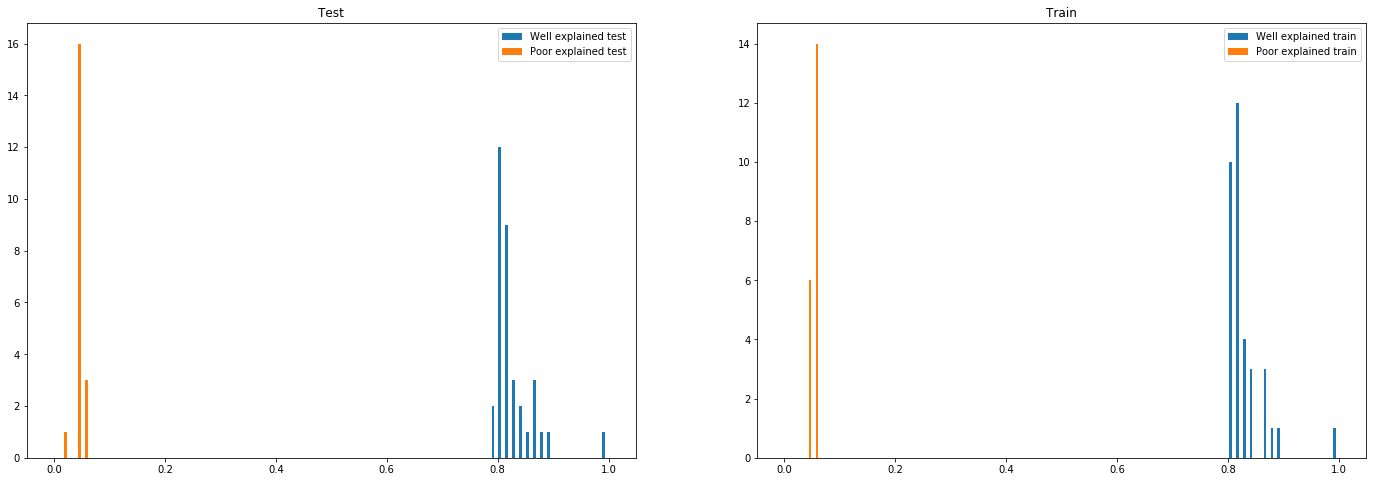

In [0]:
well_df = pd.DataFrame.from_dict(mRNA_well_stats).T
poor_df = pd.DataFrame.from_dict(mRNA_poor_stats).T

plt.figure(figsize=(24,8))
plt.subplot(121)
plt.hist([well_df["r2_avg"], poor_df["r2_avg"]], bins=80, range=[0.0, 1.0])
plt.title("Test")
plt.legend(["Well explained test", "Poor explained test"])
plt.subplot(122)
plt.hist([well_df["r2_train"], poor_df["r2_train"]], bins=80, range=[0.0, 1.0])
plt.title("Train")
plt.legend(["Well explained train", "Poor explained train"])
plt.show()

The r2 for well-explained RNA is much higher than poor-explained RNA on both train and test sets.

**Question 1.3:** In this part, we want to add a categorical feature as the 22nd predictor. Tissue type is an important factor in explaining the gene expression profile. Our samples come from 32 tissue types which are provided to you in a separate file. Use dummy variable coding to include the tissue type in your regression.  

In [0]:
dummies=pd.get_dummies(tissue_type_df)
dummies=dummies.drop(dummies.columns[0], axis=1)
miR_cat=pd.concat([miR_df, dummies], axis=1)
mRNA_cat_well_stats = fit_all(miR_cat, mRNA_well_df)
mRNA_cat_poor_stats = fit_all(miR_cat, mRNA_poor_df)
well_cat_df = pd.DataFrame.from_dict(mRNA_cat_well_stats).T
poor_cat_df = pd.DataFrame.from_dict(mRNA_cat_poor_stats).T

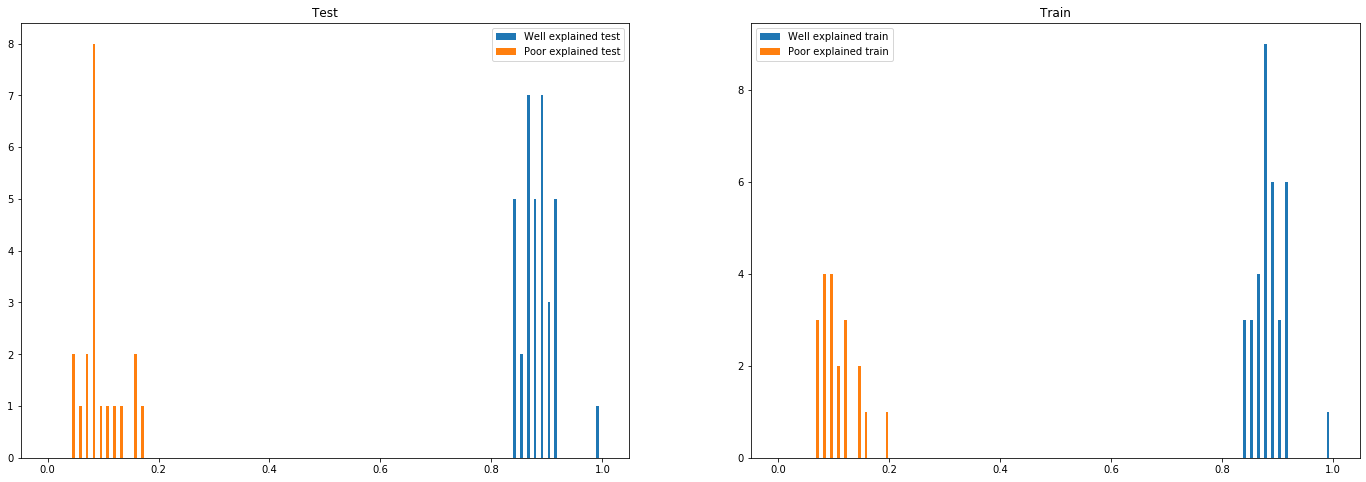

In [0]:
plt.figure(figsize=(24,8))
plt.subplot(121)
plt.hist([well_cat_df["r2_avg"], poor_cat_df["r2_avg"]], bins=80, range=[0.0, 1.0])
plt.title("Test")
plt.legend(["Well explained test", "Poor explained test"])
plt.subplot(122)
plt.hist([well_cat_df["r2_train"], poor_cat_df["r2_train"]], bins=80, range=[0.0, 1.0])
plt.title("Train")
plt.legend(["Well explained train", "Poor explained train"])
plt.show()

Notice that the r2 for all models become less smooth, and for the poor-explained RNAs, their r2 increased. for well-explained RNAs, r2 also slightly increased, which means the extra categorical information improves the performance for both types of mRNAs.

#Part 2: Logistic Regression


Import necessary packages.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Initialize the data.

In [0]:
bask_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/height_vs_weight.csv'
bask_df = pd.read_csv(bask_url)
bask_df.head()

,height,weight,female,basketball
0,74.8,221.2,0,1
1,65.6,147.3,1,1
2,74.8,166.8,0,0
3,68.5,174.1,0,0
4,66.8,156.6,1,0


Split the dataset to features and targets.

In [0]:
targets=np.array(bask_df['basketball'], dtype=float).reshape(-1,1)
scaler=StandardScaler().fit(np.array(bask_df)[:,:2])
features=np.concatenate((scaler.transform(np.array(bask_df)[:,:2]), np.array(bask_df)[:,2].reshape(-1,1)),axis=1)

Split dataset to train and test.

In [0]:
f_train, f_test, t_train, t_test=train_test_split(features, targets, test_size=0.2)

Define tool functions.

In [0]:
sigmoid = lambda x: 1/(1+np.exp(-x))

def predict_prob(weights, f):
  return sigmoid(np.dot(f,weights[1:,:]) + weights[0])

def predict(weights, f):
  a1 = predict_prob(weights, f) - 0.5
  a2 = np.sign(a1)
  a3 = a2 + 1.0
  a4 = a3 / 2.0
  return a4

def accuracy(pred, std):
  return np.sum(np.equal(pred, std)) / float(len(std))

In [0]:
def computeGradient(weights,f,t):
  pred = predict_prob(weights, f)
  error = pred-t

  f=np.concatenate((np.ones(f.shape[0]).reshape(-1,1), f), axis=1).T
  gradient=np.dot(f, error)
  return gradient

Test the function.

In [0]:
weights=np.array([0.0,0.0,0.0,0.0]).reshape(-1,1)
gradient=computeGradient(weights, f_train, t_train)
print(gradient, np.linalg.norm(gradient))

[[  4.        ]
 [-57.36611524]
 [-77.21040717]
 [  3.5       ]] 96.33570549579517


In [0]:
def logisticRegression(f, t, weights=None, learning_rate=1e-4, tolerance_avg_error=1e-5, max_iters=10000000, show_weight_iter=0):
  """
  f = features
  t = targets
  """
  if(weights==None):
    weights=np.zeros(f.shape[1]+1) #Extra 1 for the w0
  weights = weights.reshape(-1,1)

  for i in range(max_iters):
    gradient=computeGradient(weights,f,t)
    if(np.linalg.norm(gradient) < t.shape[0]*tolerance_avg_error): break
    weights = weights - learning_rate * gradient
    if(show_weight_iter>0 and i%show_weight_iter==0):
      print(weights.reshape(1,-1))

  return weights

In [0]:
def computeAverageLoss(weights, features, targets):
  pred = predict_prob(weights, features)
  return np.mean(-1*np.log(t_test*pred+(1-t_test)*(1-pred)))

**2.1** Only heights.

In [0]:
weights = logisticRegression(f_train[:,:1], t_train, show_weight_iter=1000000)

[[-0.0004      0.00573661]]


**2.1.1** Compute the average loss on the test set.


In [0]:
print("Average loss is", computeAverageLoss(weights, f_test[:,:1], t_test))

Average loss is 0.6247917335163091


**2.1.2** Compute the accuracy on the test set by predicting someone is a basketball player if P(prediction) > 0.5.

In [0]:
print("Accuracy is", accuracy(predict(weights, f_test[:,:1]),t_test))

Accuracy is 0.6625


**2.1.3** Plot the training data as well as the learned logistic regression function.

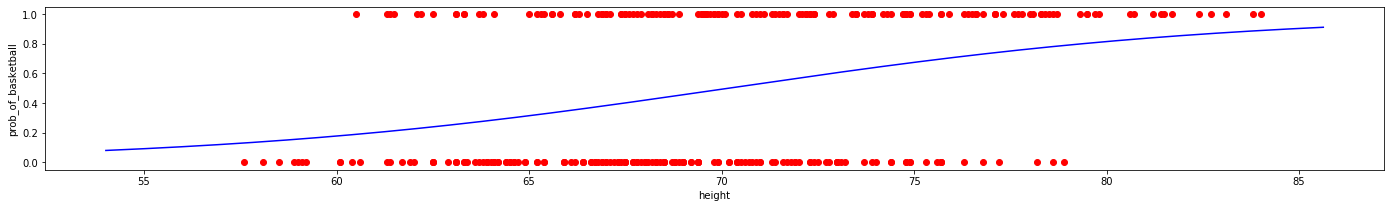

In [0]:
xs=np.arange(-3.0, 3.0, 0.01).reshape(-1,1)
res=predict_prob(weights, xs)
xs=scaler.scale_[0]*xs+scaler.mean_[0]
plt.figure(figsize=(24,3))
plt.xlabel("height")
plt.ylabel("prob_of_basketball")
plt.plot(f_train[:,:1]*scaler.scale_[0]+scaler.mean_[0], t_train, 'ro')
plt.plot(xs, res, 'b')
plt.show()

**2.2** Now train the model to be gender dependent by incorporating both the height and female features.  Evaluate on the same test set with average loss and accuracy.  Plot the logistic regression function across heights for male and female - do the learned functions make sense relative to one another?

**2.2.1** Train the model to be gender dependent by height and female.

In [0]:
weights = logisticRegression(f_train[:,0::2], t_train, show_weight_iter=1000000)

[[-0.0004      0.00573661 -0.00035   ]]


**2.2.2** Evaluate average loss and accuracy.


In [0]:
print("Average Loss is", computeAverageLoss(weights, f_test[:,0::2], t_test))
print("Accuracy is", accuracy(predict(weights, f_test[:,0::2]), t_test))

Average Loss is 0.5867556604772307
Accuracy is 0.7125


**2.2.3** Plot the logistic regression function across heights for male and female

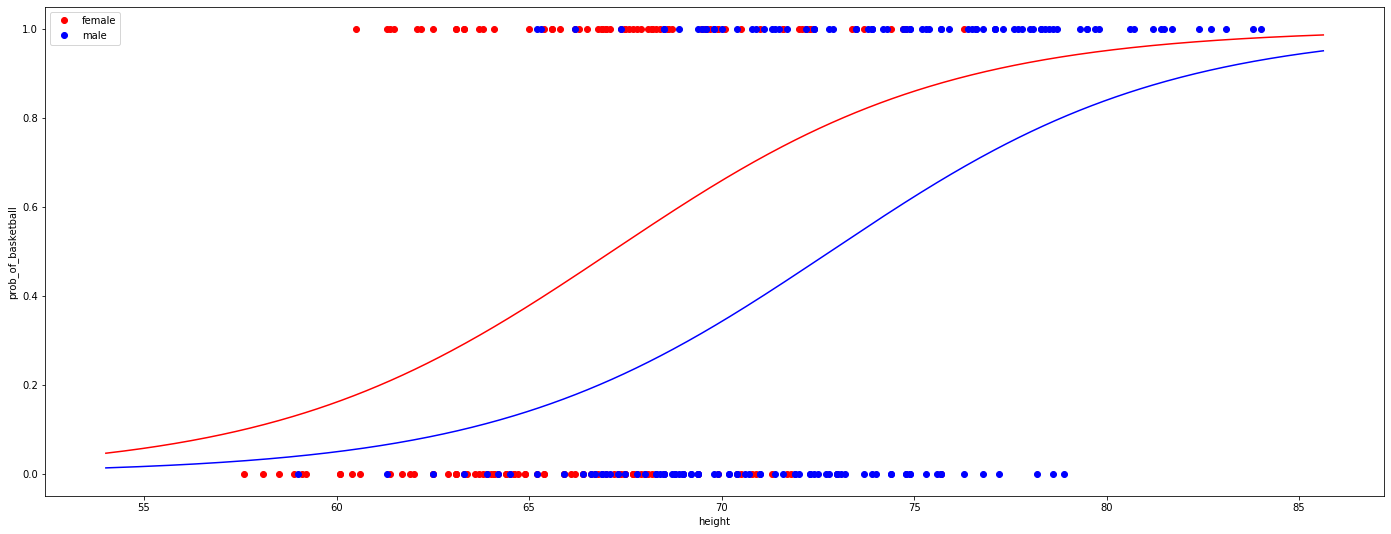

In [0]:
xs=np.arange(-3.0, 3.0, 0.01).reshape(-1,1)
xsm=np.concatenate((xs, np.zeros(len(xs)).reshape(-1,1)), axis=1)
xsf=np.concatenate((xs, np.ones(len(xs)).reshape(-1,1)), axis=1)
resm=predict_prob(weights, xsm)
resf=predict_prob(weights, xsf)
xs=scaler.scale_[0]*xs+scaler.mean_[0]

of_train=np.concatenate((f_train[:,:1]*scaler.scale_[0]+scaler.mean_[0], f_train[:,-1:]), axis=1)
plt.figure(figsize=(24,9))
plt.xlabel("height")
plt.ylabel("prob_of_basketball")
plt.plot(of_train[f_train[:,2]==1,:][:,0], t_train[f_train[:,2]==1], 'ro', label="female")
plt.plot(xs, resf, 'r')
plt.xlabel("height")
plt.ylabel("prob_of_basketball")
plt.plot(of_train[f_train[:,2]==0,:][:,0], t_train[f_train[:,2]==0], 'bo', label="male")
plt.plot(xs, resm, 'b')
plt.legend()
plt.show()

I think the function makes sense for males, but not for females. For females, many point are on the left side of x when P(x) = 0.5, which means the function tends to categorize female as not basketball player. For males, the data are splitted better.

**2.3** Incorporate the weight feature (training (height, weight) and (height, weight, gender)). Evaluate on average loss and accuracy.  Does weight help as a feature?

**2.3.1** (height, weight)

In [0]:
weights = logisticRegression(f_train[:,:2], t_train, show_weight_iter=1000000)

[[-0.0004      0.00573661  0.00772104]]


In [0]:
print("Average Loss is", computeAverageLoss(weights, f_test[:,:2], t_test))
print("Accuracy is", accuracy(predict(weights, f_test[:,:2]), t_test))

Average Loss is 0.5224391779624284
Accuracy is 0.7125


**2.3.2** (height, weight, gender)

In [0]:
weights = logisticRegression(f_train, t_train, show_weight_iter=1000000)

[[-0.0004      0.00573661  0.00772104 -0.00035   ]]


In [0]:
print("Average Loss is", computeAverageLoss(weights, f_test, t_test))
print("Accuracy is", accuracy(predict(weights, f_test), t_test))

Average Loss is 0.5024383767815206
Accuracy is 0.7375


I think the weight helps as a feature, considering incorperating the weight into the training features decreased average loss and increased accuracy.